# <ins>Scattering Modelling of a Sphere</ins>

## The scattering amplitude $A(q)$ and (normalized) form factor $P(q)$

The scattering amplitude of a sphere of radius $R$, with homogeneous SLD ($\Delta \rho$), is

$A(q) = \Delta \rho \ \left( \frac{4}{3} \pi R^3  \right) \left[ 3 \frac{\sin(qR)-qR\cos(qR)}{(qR)^3} \right] \qquad \text{or} \qquad A(q)= \Delta \rho \ V \left[ 3 \frac{j_1(qR)}{qR} \right]$

The scattering intensity is

$I(q)=n|A(q)|^2 = n \Delta \rho^ 2 \ V^2 P(q)\qquad \text{where} \qquad P(q)= \left[ 3 \frac{j_1(qR)}{qR} \right]^2$

In [1]:
#!/usr/bin/python

import math
import numpy as np
import Sphere_models as sph
import matplotlib
import matplotlib.pyplot as plt
from ipywidgets import interact

def normalize(x,ra,rb):
    return (x-rb)/(ra-rb)
    
fs = 7 #figure size

In [2]:
def interactive_shell_0( R=20 ):
    # define q range
    q = np.logspace(-3,0.5, num=500, endpoint=True, base=10.0)
    # initialize q range in 2D
    q1 = 10**0
    pxl = 500
    xx = np.linspace(-q1,+q1, pxl, endpoint=True)
    yy = np.linspace(-q1,+q1, pxl, endpoint=True)
    X, Y = np.meshgrid(xx, yy)
    # calculate 2D scattering form factor
    Z = sph.sphere_amp(np.sqrt(X**2+Y**2),R)**2

    # Initialize plot
    fig, axs = plt.subplots(1,3,figsize=(fs*3.8,fs*0.8))

    # Panel A: 2D form factor
    Zmax = math.log(np.max(Z),10)
    Zmin = math.log(np.min(Z),10)

    axs[0].text(-1.2, 1.1, r'A', fontsize=24)
    axs[0].set_xlabel('$q_x$ (nm$^{-1}$)', fontsize=16)
    axs[0].set_ylabel('$q_y$ (nm$^{-1}$)', fontsize=16)
    axs[0].pcolormesh(X, Y, np.log10(Z), vmin=Zmin, vmax=Zmax, edgecolors=None, cmap='Blues_r')
    axs[0].set(xlim=(-q1,q1), ylim=(-q1,q1))

    cmap = matplotlib.cm.Blues_r
    norm = matplotlib.colors.Normalize(vmin=1e-6, vmax=1)
    fig.colorbar(matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap), ax=axs[0], orientation='vertical', label='$P(q)$')

    # Panel B: 1D form factor
    axs[1].text(0.006, 3, r'B', fontsize=24)
    axs[1].set_xlabel('$q$ (nm$^{-1}$)', fontsize=16)
    axs[1].set_ylabel('$P(q)$', fontsize=16)
    axs[1].set_xscale('log')
    axs[1].set_yscale('log')
    axs[1].minorticks_on()
    axs[1].tick_params(axis='both', which='major', labelsize=14)
    axs[1].axhline(y=1, ls='--', color='gray')
    axs[1].set(xlim=(0.01,q1), ylim=(1e-6,2))
    axs[1].plot(q, sph.sphere_amp(q,R)**2, color="blue", label='Sphere $R=%.0f$ nm'%(R))
    axs[1].legend(fontsize=16)

    # Panel C: sphere in real space
    axs[2].text(-60, 55, r'C', fontsize=24)
    # SLDs' color
    rs = 9.3 # x10^4 nm^-2
    r0 = 16.9 # x10^4 nm^-2
    # Draw circle
    c0 = plt.Circle((0, 0), radius=R, color=str(normalize(r0,rs,r0)), label='0')
    axs[2].add_patch(c0)
    # Fill circle
    axs[2].set_facecolor(str(normalize(rs,rs,r0)))
    axs[2].set(xlim=(-50,50), ylim=(-50,50))

 
    cmap = matplotlib.cm.gray_r
    norm = matplotlib.colors.Normalize(vmin=rs, vmax=r0)
    fig.colorbar(matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap), ax=axs[2], orientation='vertical', label='$\\rho$ $x10^{-4}$ (nm$^{-2}$)')
   
    plt.show()

interact(interactive_shell_0,  R=(7, 50, 1))

interactive(children=(IntSlider(value=20, description='R', max=50, min=7), Output()), _dom_classes=('widget-in…

<function __main__.interactive_shell_0(R=20)>

## Rescaling *x*-axis

The scattering amplitude and intensity of a sphere as a function of $qR$ collapse in a single curve


> <span style="color:green"> 💡 **Tip: Use the first zero of $[3j_1(x)/x]$ to estimate sphere radius!**</span>



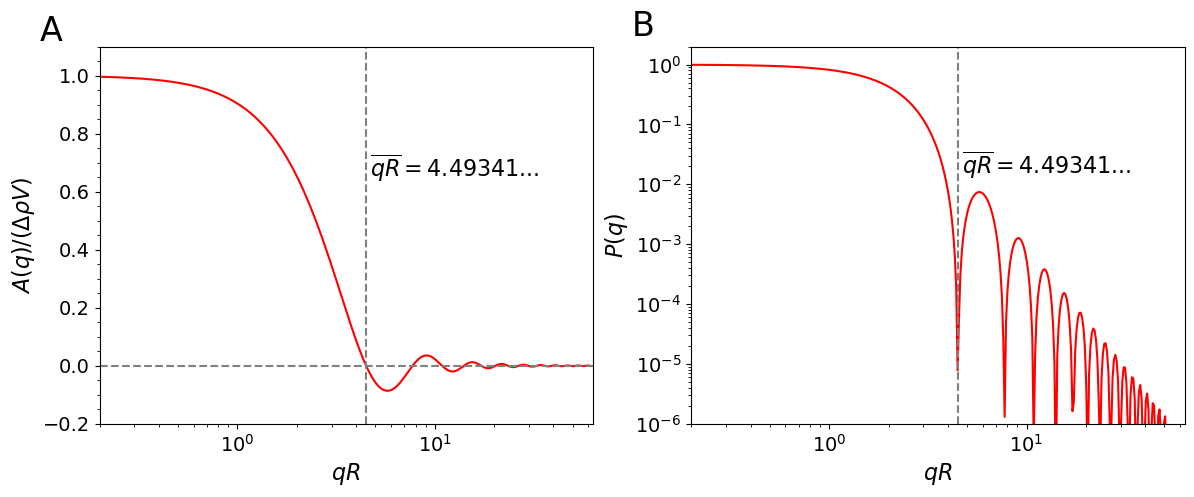

In [3]:
from scipy.optimize import brentq

radius=20
q = np.logspace(-3,0.5, num=500, endpoint=True, base=10.0)

# Find the first zero of 3*j_1(qR)/(qR)
first_zeros = brentq(sph.sphere_amp_scaled, 3, 5)

# Initialize plot
fig, axs = plt.subplots(1,2,figsize=(fs*2,fs/5*3.5))

# set common options
for a in axs:
    a.set_xlabel('$qR$', fontsize=16)
    a.set_xscale('log')
    a.minorticks_on()
    a.tick_params(axis='both', which='major', labelsize=14)
    #a.legend()

# Panel A: amplituder
axs[0].text(0.1,1.12, r'A', fontsize=24)
axs[0].set_ylabel('$A(q)/(\\Delta \\rho V)$', fontsize=16)
axs[0].set(xlim=(0.01*radius,10**0.5*radius), ylim=(-0.2,1.1))
axs[0].plot(q*radius, sph.sphere_amp(q,radius), color="red", label='Sphere')
axs[0].axhline(y=0, ls='--', color='gray')
axs[0].axvline(x=first_zeros, ls='--', color='gray')
axs[0].text(first_zeros*1.05, 0.65, r'$\overline{qR} = %.5f$...'%(first_zeros), fontsize=16)

# Panel B: Form factor
axs[1].text(0.1,3, r'B', fontsize=24)
axs[1].set_ylabel('$P(q)$', fontsize=16)
axs[1].set(xlim=(0.01*radius,10**0.5*radius), ylim=(1e-6,2))
axs[1].set_yscale('log')
axs[1].plot(q*radius, sph.sphere_amp(q,radius)**2, color="red", label='Sphere')
axs[1].axvline(x=first_zeros, ls='--', color='gray')
axs[1].text(first_zeros*1.05, 0.015, r'$\overline{qR} = %.5f$...'%(first_zeros), fontsize=16)

plt.show()

## Scaling *y*-axis

### Example: size and volume

In [4]:
# concentration 
n = 1e-11 # nm^-3
# Excess SLD
rs = 9.4 # x10^4 nm^-2
r0 = 16.9 # x10^4 nm^-2
Dr = (r0-rs)*1e-4 # nm^-2
# Radius ref 
R0 = 25 # nm

def interactive_shell_1( R=20 ):
    # define q range
    q = np.logspace(-3,0.0, num=500, endpoint=True, base=10.0)
    q1 = 10**0

    #calculate scattering intensity
    I0 = n*sph.sphere_int(q,R0,Dr)
    I = n*sph.sphere_int(q,R,Dr)
    
    # Initialize plot
    fig, axs = plt.subplots(1,2,figsize=(fs*2.5,fs*0.8))

    # Panel A: 1D form factor
    axs[0].text(0.006, 3e-5, r'A', fontsize=24)
    axs[0].set_xlabel('$q$ (nm$^{-1}$)', fontsize=16)
    axs[0].set_ylabel('$I(q)$ (nm$^{-1}$)', fontsize=16)
    axs[0].set_xscale('log')
    axs[0].set_yscale('log')
    axs[0].minorticks_on()
    axs[0].tick_params(axis='both', which='major', labelsize=14)
    axs[0].set(xlim=(0.01,q1), ylim=(1e-14,1e-5))
    axs[0].plot(q, I0, color="gray", ls='--', label='$R_0=%.0f$ nm'%(R0))
    axs[0].plot(q, I, color="blue", label='$R=%.0f$ nm'%(R))
    axs[0].legend(fontsize=16)

    # Panel B: sphere in real space
    axs[1].text(-60, 55, r'B', fontsize=24)
    # SLDs' color
    rs = 9.3 # x10^4 nm^-2
    r0 = 16.9 # x10^4 nm^-2
    # Draw circle
    c0 = plt.Circle((0, 0), radius=R, color=str(normalize(r0,rs,r0)), label='0')
    axs[1].add_patch(c0)
    # Fill circle
    axs[1].set_facecolor(str(normalize(rs,rs,r0)))
    axs[1].set(xlim=(-50,50), ylim=(-50,50))
 
    cmap = matplotlib.cm.gray_r
    norm = matplotlib.colors.Normalize(vmin=rs, vmax=r0)
    fig.colorbar(matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap), ax=axs[1], orientation='vertical', label='$\\rho$ $x10^{-4}$ (nm$^{-2}$)')
   
    plt.show()

interact(interactive_shell_1,  R=(5, 50, 1))

interactive(children=(IntSlider(value=20, description='R', max=50, min=5), Output()), _dom_classes=('widget-in…

<function __main__.interactive_shell_1(R=20)>

### Example: contrast

In [5]:
# concentration 
n = 1e-11 # nm^-3
# Excess SLD
rhosol_0 = 9.4 # x10^4 nm^-2
rho_0 = 9.6 # x10^4 nm^-2
# Radius ref 
R0 = 25 # nm

def interactive_shell_2( rho=9.6, rhosol=9.4 ):
    # define q range
    q = np.logspace(-3,0.0, num=500, endpoint=True, base=10.0)
    q1 = 10**0

    #calculate scattering intensity
    Ib0 = n*sph.sphere_int(q,R0,(rho_0-rhosol_0)*1e-4)
    Ib = n*sph.sphere_int(q,R0,(rho-rhosol)*1e-4)
    
    # Initialize plot
    fig, axs = plt.subplots(1,2,figsize=(fs*2.5,fs*0.8))

    # Panel A: 1D form factor
    axs[0].text(0.006, 3e-6, r'A', fontsize=24)
    axs[0].set_xlabel('$q$ (nm$^{-1}$)', fontsize=16)
    axs[0].set_ylabel('$I(q)$ (nm$^{-1}$)', fontsize=16)
    axs[0].set_xscale('log')
    axs[0].set_yscale('log')
    axs[0].minorticks_on()
    axs[0].tick_params(axis='both', which='major', labelsize=14)
    axs[0].set(xlim=(0.01,q1), ylim=(1e-16,1e-6))
    axs[0].plot(q, Ib0, color="gray", ls='--', label='$\\Delta \\rho=%.2f$ $x10^{-4}$ nm$^-2$'%(rho_0-rhosol_0))
    axs[0].plot(q, Ib, color="blue", label='$\\Delta \\rho=%.2f$ $x10^{-4}$ nm$^-2$'%((rho-rhosol)))
    axs[0].legend(fontsize=16)

    # Panel B: sphere in real space
    axs[1].text(-60, 55, r'B', fontsize=24)
    # SLDs' color
    rs = 9.3 # x10^4 nm^-2
    r0 = 16.9 # x10^4 nm^-2
    # Draw circle
    c0 = plt.Circle((0, 0), radius=R0, color=str(normalize(rho,7.5,16.9)), label='0')
    axs[1].add_patch(c0)
    # Fill circle
    axs[1].set_facecolor(str(normalize(rhosol,7.5,16.9)))
    axs[1].set(xlim=(-50,50), ylim=(-50,50))
 
    cmap = matplotlib.cm.gray_r
    norm = matplotlib.colors.Normalize(vmin=7.5, vmax=16.9)
    fig.colorbar(matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap), ax=axs[1], orientation='vertical', label='$\\rho$ $x10^{-4}$ (nm$^{-2}$)')
   
    plt.show()

interact(interactive_shell_2,  rho=(8.0, 16.9, 0.1),  rhosol=(7.5, 10.5, 0.1))

interactive(children=(FloatSlider(value=9.6, description='rho', max=16.9, min=8.0), FloatSlider(value=9.4, des…

<function __main__.interactive_shell_2(rho=9.6, rhosol=9.4)>

# Moving to real systems: Polydispersity!

> <span style="color:blue"> 🛈 **Note** </span>
>
> * The forward scattering is no longer proportional to the squared volume, but to its second moment.
> $I_\text{poly}(0) = n \int I(0,R') D(R')\ \text{d}R' = n \Delta \rho^2 \int V^2 D(R')\ \text{d}R' = n \Delta \rho^2 \langle V^2 \rangle = n \Delta \rho^2 \left( \frac{4}{3}\pi \right)^2 \langle R^6 \rangle$
>
> * The positions of the minima change slightly, but the first minimum can still be used to get an estimate of the mean particle size.

Definition: **PolyDispersity Index** (**PDI**): $PDI= \sigma / \langle R \rangle$, where $\sigma=\sqrt{\langle R^2 \rangle - \langle R \rangle^2}$

### A common case: the Normal distribution

To simulated/analyze data, one must first *guess* a possible PDF. A common one is the Normal distribution:

$N(R,\mu,\sigma) = \text{e}^{-\frac{ \left( R-\mu  \right)^2}{2\sigma^2}} \left( \sigma\sqrt{2\pi} \right)^{-1}$
<br> which is defined by its mean, $\mu=\langle R \rangle$, and width, $\sigma=\sqrt{\langle R^2 \rangle - \langle R \rangle^2}$ (standard deviation).





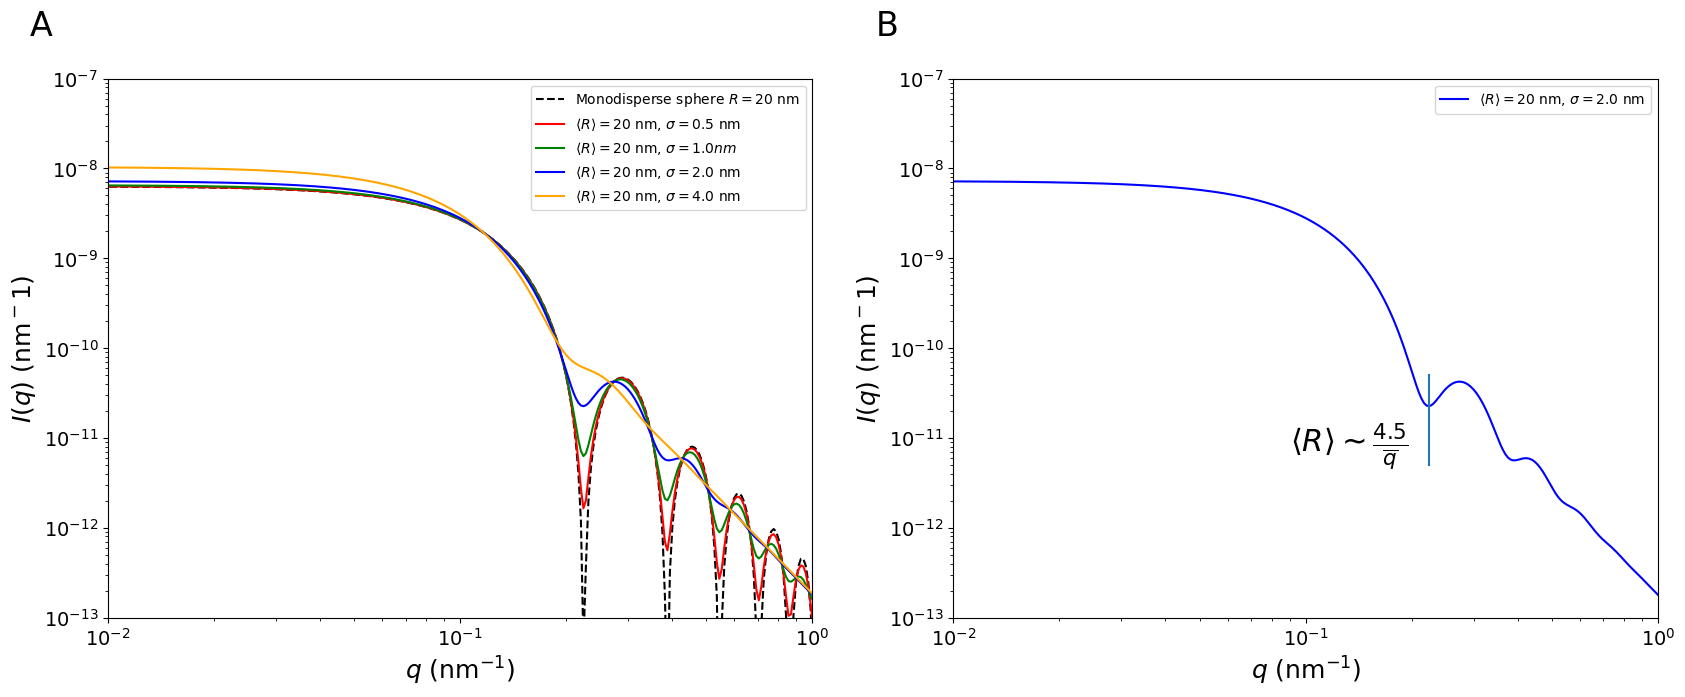

In [6]:
# radius mean and standard deviation
Rm = 20 # nm
sigma = [0.5, 1.0, 2.0, 4.0] # nm

Delta_rho = (r0 - rs)*1e-4

# Initialize plot
fig, axs = plt.subplots(1,2,figsize=(10*2,7))

# Panel A: comparison between different PDI
axs[0].text(0.006, 3e-7, r'A', fontsize=24)
axs[0].plot(q, n*sph.sphere_int(q,Rm,Delta_rho), color="black", ls="--", label='Monodisperse sphere $R=20$ nm')
axs[0].plot(q, sph.sphere_int_normal(q,n,Rm,sigma[0],Delta_rho), color="red", label='$\\langle R \\rangle=20$ nm, $\\sigma=0.5$ nm')
axs[0].plot(q, sph.sphere_int_normal(q,n,Rm,sigma[1],Delta_rho), color="green", label='$\\langle R \\rangle=20$ nm, $\\sigma=1.0 nm$')
axs[0].plot(q, sph.sphere_int_normal(q,n,Rm,sigma[2],Delta_rho), color="blue", label='$\\langle R \\rangle=20$ nm, $\\sigma=2.0$ nm')
axs[0].plot(q, sph.sphere_int_normal(q,n,Rm,sigma[3],Delta_rho), color="orange", label='$\\langle R \\rangle=20$ nm, $\\sigma=4.0$ nm')

# Panel B: size estimation
axs[1].text(0.006, 3e-7, r'B', fontsize=24) 
axs[1].plot(q, sph.sphere_int_normal(q,n,Rm,sigma[2],Delta_rho), color="blue", label='$\\langle R \\rangle=20$ nm, $\\sigma=2.0$ nm')
axs[1].text(0.09, 7e-12, r'$ \langle R \rangle \sim \frac{4.5}{\overline{q}}$', fontsize=22)
axs[1].plot([4.49/Rm,4.49/Rm],[5e-12,5e-11])

# common settings
for a in axs:
    a.set(xlim=(0.01,1), ylim=(1e-13,1e-7))
    a.set_xscale('log')
    a.set_yscale('log')
    a.set_xlabel('$q$ (nm$^{-1}$)', fontsize=18)
    a.set_ylabel('$I(q)$ (nm$^-1$)', fontsize=18)
    a.minorticks_on()
    a.tick_params(axis='both', which='major', labelsize=14)
    a.legend()
	
plt.show()

### Example: Normal vs Lognormal -> Symmetric vs Skewed distribution

In [7]:
m = 2.992
s = 0.1

def interactive_poly(R_n, s_n, m, s):
    r = np.linspace(1, 150, 1000)
    q = np.logspace(-2,0, num=500, endpoint=True, base=10.0)
    
    N = sph.PDF_norm(r, R_n, s_n)
    L = sph.PDF_lognorm(r,m,s)
    
    I_N = sph.sphere_int_normal(q,n,R_n,s_n,Delta_rho)
    I_L = sph.sphere_int_lognorm(q,n,m,s,Delta_rho)
    
    fig, axs = plt.subplots(1,2,figsize=(10*2,7))

    # Panel B: PDF comparison
    axs[0].set_xlabel('$r$ (nm)', fontsize=18)
    axs[0].set_ylabel('PDF', fontsize=18)
    axs[0].plot(r, N, color="red", label='Normal PDF')
    axs[0].plot(r, L, color="blue", label='Log normal PDF')

    # Panel B: I(q) comparison
    axs[1].set_xlabel('$q$ (nm$^{-1}$)', fontsize=18)    
    axs[1].set_ylabel('$I(q)$ (nm$^-1$)', fontsize=18)
    axs[1].set_xscale('log')
    axs[1].set_yscale('log')
    axs[1].plot(q, I_N, color="red", label='Normal PDF')
    axs[1].plot(q, I_L, color="blue", label='Log normal PDF')

    # common settings
    for a in axs:
        a.minorticks_on()
        a.tick_params(axis='both', which='major', labelsize=14)
        a.legend()

    plt.show()
    
    Rm = math.exp(m+s**2/2)
    sR = math.sqrt( ( math.exp(s**2) -1 ) * math.exp(2*m+s**2) )
    print("Mean radius (lognormal) = ", Rm, " nm")
    print("Radius st. dev. (lognormal) = ", sR, " nm")

interact(interactive_poly, R_n=(8, 70, 0.5), s_n=(0.2, 16, 0.2), m=(2.0, 4.2, 0.1), s=(0.01, 0.24, 0.02))

interactive(children=(FloatSlider(value=39.0, description='R_n', max=70.0, min=8.0, step=0.5), FloatSlider(val…

<function __main__.interactive_poly(R_n, s_n, m, s)>